In [30]:
import pandas as pd
import numpy as np

In [31]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [22]:
parking= pd.read_csv('광진구_공영주차장 정보.csv')

In [68]:
#필요한 컬럼만 가져오기
pl=parking.iloc[:,2:5]
pl

,동명,시설명,위치
0,중곡1동,중곡제일전통시장 공영,중곡1동 221-6
1,중곡2동,장신구,중곡2동 133-10
2,중곡2동,중곡동복개천,중곡2동 150-196
3,중곡3동,중곡3동마을공원,중곡3동 195-1
4,중곡3동,중곡체육센터,중곡3동 168-8
5,중곡4동,신성시장길,중곡4동 453 일대
6,중곡4동,새오름,중곡4동 143-70
7,중곡4동,용마산남,중곡4동 69-2
8,중곡4동,긴고랑길공영,중곡4동 72-1 외
9,중곡4동,해오름,중곡4동 87-14


In [67]:
# 주소 컬럼만
address=pl.loc[:,'위치']
print(address)

0        중곡1동 221-6
1       중곡2동 133-10
2      중곡2동 150-196
3        중곡3동 195-1
4        중곡3동 168-8
5       중곡4동 453 일대
6       중곡4동 143-70
7         중곡4동 69-2
8       중곡4동 72-1 외
9        중곡4동 87-14
10     중곡4동 176-110
11       면목4동 산75-2
12     중곡4동 176-119
13           능동 205
14           능동 377
15      구의1동 243-78
16       구의1동 230-7
17        구의2동 30-9
18        구의2동 72-8
19           구의2동 6
20    구의3동 609-1 일대
21      구의3동 219-15
22       구의3동 623-1
23        광장동 275-5
24     광장동 394-43 외
25          광장동 126
26      자양1동 631-18
27         자양2동 594
28      자양3동 712 일대
29         자양4동 5-5
30        자양4동 10-2
31       화양동 110-67
32         화양동 63-2
33        화양동 523-2
34         군자동 2-41
35          군자동 374
Name: 위치, dtype: object


In [58]:
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [101]:
latitude = []
longitude =[]

for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

In [104]:
address_df = pd.DataFrame({'시설명':parking['시설명'],'주소':address,'위도':latitude,'경도':longitude})
address_df

,시설명,주소,위도,경도
0,중곡제일전통시장 공영,중곡1동 221-6,37.562928,127.078277
1,장신구,중곡2동 133-10,37.560340,127.084358
2,중곡동복개천,중곡2동 150-196,0.000000,0.000000
3,중곡3동마을공원,중곡3동 195-1,37.567450,127.081352
4,중곡체육센터,중곡3동 168-8,37.567450,127.081352
5,신성시장길,중곡4동 453 일대,0.000000,0.000000
6,새오름,중곡4동 143-70,37.562810,127.094389
7,용마산남,중곡4동 69-2,37.562810,127.094389
8,긴고랑길공영,중곡4동 72-1 외,0.000000,0.000000
9,해오름,중곡4동 87-14,37.562810,127.094389


In [76]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [100]:
import folium
from folium import Marker

m = folium.Map(location=[latitude[14],longitude[14]], zoom_start=14)

for i in range(len(address_df)):
      Marker(location = [address_df.loc[i]['위도'], address_df.loc[i]['경도']],
           icon=folium.Icon(color='blue')
          ).add_to(m)



m

In [134]:
pv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39732 entries, 0 to 39731
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   단속일시    39732 non-null  object
 1   단속원금    39732 non-null  int64 
 2   단속동     39732 non-null  object
 3   단속장소    39732 non-null  object
 4   위반내용    39732 non-null  object
 5   견인지시    39732 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


In [137]:
pv.describe(include='object').T

,count,unique,top,freq
단속일시,39732,35902,2022-07-21 14:32,8
단속동,39732,22,구의동,10033
단속장소,39732,6009,지너스타워 주차장 앞,1386
위반내용,39732,20,교통소통장애,9951
견인지시,39732,2,미견인,38631


In [138]:
pv.isnull().sum()

단속일시    0
단속원금    0
단속동     0
단속장소    0
위반내용    0
견인지시    0
dtype: int64

In [140]:
pv.select_dtypes(object).columns

Index(['단속일시', '단속동', '단속장소', '위반내용', '견인지시'], dtype='object')

In [142]:
pv.단속동.nunique()

22

In [175]:
pv.단속동.value_counts()

구의동         10033
중곡동          9366
자양동          7859
광장동          4671
군자동          2937
화양동          2561
능동           2283
자양강변길           3
긴고랑로            3
아차산로70길         2
구의강변로3가길        2
능동로             2
광나루로            1
동일로             1
면목로17길          1
강변북로            1
아차산로58길         1
천호대로104길        1
동일로60길          1
군자로             1
용마산로21길         1
동일로72길          1
Name: 단속동, dtype: int64

In [180]:
pv1=pv['단속동'].value_counts().loc[lambda x:x>4]
pv1

구의동    10033
중곡동     9366
자양동     7859
광장동     4671
군자동     2937
화양동     2561
능동      2283
Name: 단속동, dtype: int64

<BarContainer object of 7 artists>

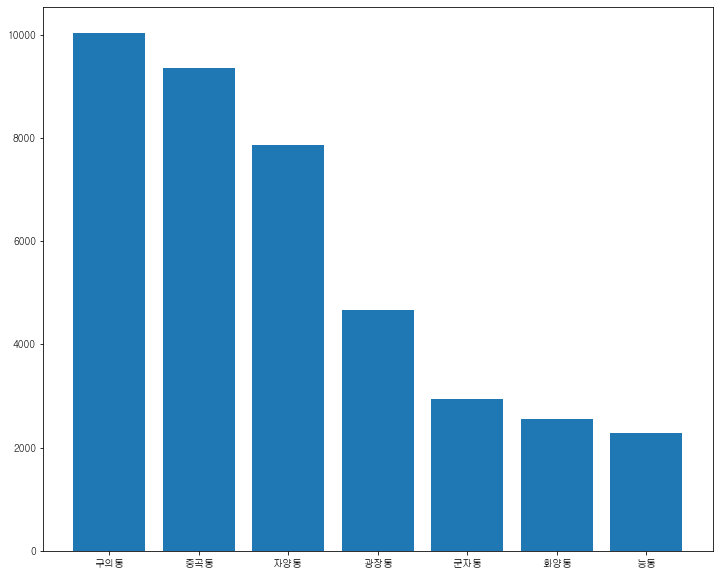

In [183]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(pv1.index, pv1)